# **Tugas 1 Visi Komputer**

# Visualisasi Dataset Fashion-MNIST

Pada bagian ini, kita akan melakukan visualisasi beberapa gambar dari dataset Fashion-MNIST untuk mendapatkan gambaran tentang data yang akan kita gunakan.

---

## Langkah-Langkah Kode

### 1. Membaca Dataset  
Dataset Fashion-MNIST dibaca menggunakan library **pandas** dari file CSV `fashion-mnist_test.csv`. Dataset ini berisi data gambar pakaian berukuran 28x28 piksel dalam bentuk flattened (datar), serta label kelas masing-masing gambar.

```python
data = pd.read_csv('fashion-mnist_test.csv')


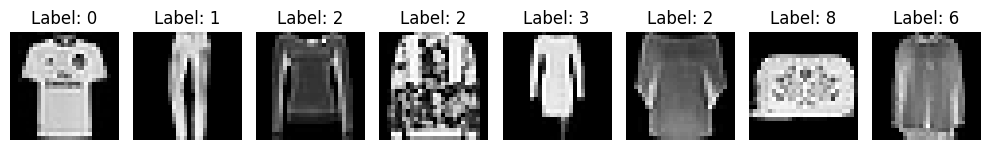

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca dataset
data = pd.read_csv('fashion-mnist_test.csv')

# 2. Ambil label dan gambar
labels = data['label'].values
images = data.drop('label', axis=1).values.reshape(-1, 28, 28)

# 3. Tampilkan 4 gambar pertama
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Berikut penjelasan rapi dan lengkap untuk kode SVM yang kamu berikan, bisa kamu gunakan sebagai README atau dokumentasi di notebook:

---

# Implementasi Klasifikasi Fashion-MNIST menggunakan Support Vector Machine (SVM)

---

## 1. Import Library

Mengimpor library utama:

* **pandas** dan **numpy** untuk manipulasi data,
* **scikit-learn** untuk split data, preprocessing (StandardScaler), model SVM, dan evaluasi.

---

## 2. Load Dataset

Membaca dataset Fashion-MNIST dari file CSV `fashion-mnist_test.csv`. Dataset berisi label dan fitur piksel gambar berukuran 28x28 piksel (784 fitur).

---

## 3. Ekstrak Fitur dan Label

Memisahkan kolom label (`y`) dan fitur gambar (`X`). Fitur gambar adalah nilai pixel grayscale yang akan digunakan sebagai input model.

---

## 4. Split Data Training dan Testing

Data dibagi menjadi:

* **80% training** untuk melatih model,
* **20% testing** untuk evaluasi model,
  dengan `random_state=42` agar hasil split konsisten.

---

## 5. Normalisasi Fitur

Karena fitur gambar berupa nilai piksel, dilakukan normalisasi menggunakan **StandardScaler** agar fitur memiliki mean 0 dan standar deviasi 1.
Ini membantu model SVM bekerja lebih optimal.

---

## 6. Inisialisasi dan Training Model SVM

Model SVM dibuat dengan kernel **RBF (Radial Basis Function)** dan `gamma='scale'` yang secara otomatis menyesuaikan parameter kernel.
Model kemudian dilatih menggunakan data training yang sudah dinormalisasi.

---

## 7. Prediksi dan Evaluasi Model

Model digunakan untuk memprediksi label data testing.
Evaluasi dilakukan dengan menghitung akurasi dan menampilkan laporan klasifikasi lengkap yang berisi precision, recall, f1-score untuk setiap kelas.

---

## 8. Contoh Hasil Prediksi

Menampilkan hasil prediksi model untuk 10 data testing pertama, lengkap dengan label prediksi dan label asli, serta mapping label angka ke nama kelas pakaian.



In [6]:
# Import Library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Dataset
data = pd.read_csv('fashion-mnist_test.csv')

# 2. Ekstrak fitur dan label
X = data.drop('label', axis=1).values
y = data['label'].values

# 3. Split data menjadi training dan testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Inisialisasi dan training model SVM
model_svm = SVC(kernel='rbf', gamma='scale', random_state=42)
model_svm.fit(X_train, y_train)

# 6. Prediksi pada data test
y_pred = model_svm.predict(X_test)

# 7. Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi pada data uji: {accuracy:.2%}\n")

print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

# 8. Tampilkan contoh hasil klasifikasi 10 data test pertama
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

print("\nContoh hasil klasifikasi dari data test:\n")
for i in range(10):
    print(f"Data ke-{i+1}: Prediksi = {label_map[y_pred[i]]} ({y_pred[i]}), Label Asli = {label_map[y_test[i]]} ({y_test[i]})")


Akurasi pada data uji: 86.15%

Laporan klasifikasi:
               precision    recall  f1-score   support

           0       0.77      0.80      0.78       192
           1       0.99      0.95      0.97       192
           2       0.81      0.77      0.79       212
           3       0.83      0.91      0.87       205
           4       0.81      0.87      0.84       204
           5       0.94      0.96      0.95       193
           6       0.68      0.57      0.62       200
           7       0.92      0.92      0.92       206
           8       0.90      0.95      0.93       196
           9       0.94      0.92      0.93       200

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Contoh hasil klasifikasi dari data test:

Data ke-1: Prediksi = Pullover (2), Label Asli = Coat (4)
Data ke-2: Prediksi = Ankle boot (9), Label Asli = Ankle boot (9)
Data ke-3: Prediksi =

<Figure size 1000x800 with 0 Axes>

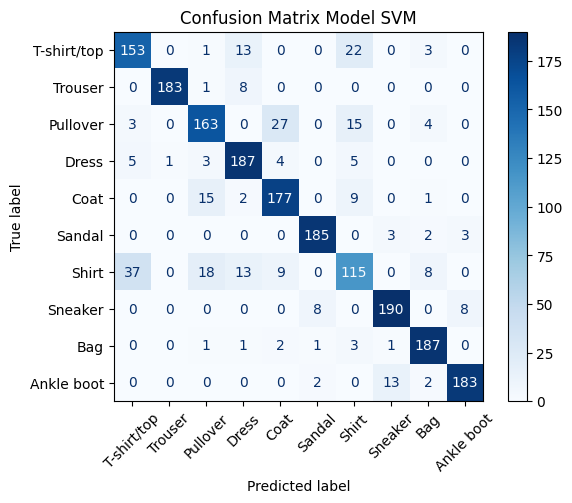

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dengan label kelas
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title('Confusion Matrix Model SVM')
plt.show()
